In [13]:
#import necessary libraries
import pandas as pd       #to read csv file

df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# separate from target variables as it is a unsupervised machine learning

df_indep = df.drop(["Id","Species"],axis="columns")
df_indep

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# let's see if there is missing values or not

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
df_indep.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [17]:
# we can drop  PetalWidthCm as it is highly correlated with PetalLengthCm SepalLenthCm asn and we can drop
# PetalLengthCm	as it is higly correlated with SepalLenthCm

df_important = df_indep.drop(["PetalWidthCm","PetalLengthCm"],axis =1)
df_important

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


<AxesSubplot:xlabel='SepalLengthCm'>

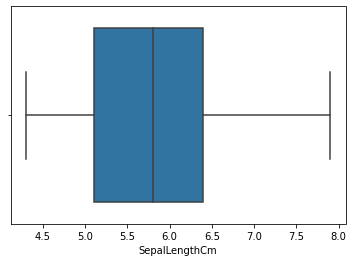

In [18]:
import seaborn as sns
sns.boxplot(x=df_important['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

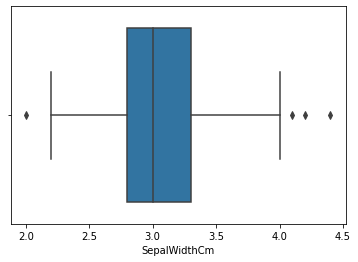

In [19]:
import seaborn as sns
sns.boxplot(x=df_important['SepalWidthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

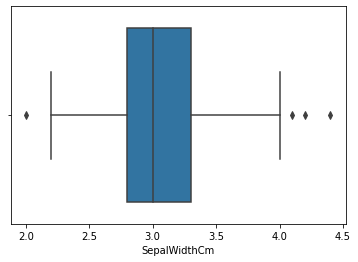

In [20]:
import seaborn as sns
sns.boxplot(x=df_important['SepalWidthCm'])

In [21]:
len(df_important)

150

In [22]:
#droping outliers
import numpy as np

Q75 =df_important["SepalWidthCm"].quantile(0.75)
Q25 =df_important["SepalWidthCm"].quantile(0.25)
IQR = Q75-Q25
max = Q75+(1.5*IQR)
min = Q25-(1.5*IQR)

upper_bound = df_important["SepalWidthCm"] >= (Q75+1.5*IQR)
lower_bound = df_important["SepalWidthCm"] <= (Q25-1.5*IQR)

index = df_important["SepalWidthCm"].index[upper_bound | lower_bound]

# now drop those ouliers
len(df_important.drop(index))




146

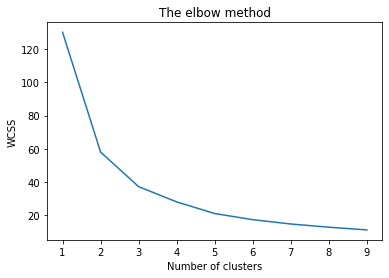

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df_important)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Here we can see optimum number of cluster is between 3 and 4 , so let's choose 3

In [24]:

# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_important)


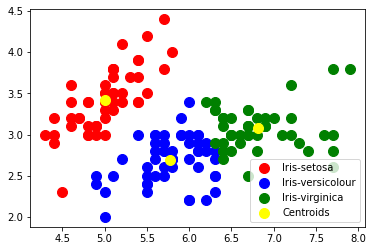

In [25]:
# Visualising the clusters 
plt.scatter(df_important["SepalLengthCm"][y_kmeans == 0], df_important["SepalWidthCm"][y_kmeans == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df_important["SepalLengthCm"][y_kmeans == 1], df_important["SepalWidthCm"][y_kmeans == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df_important["SepalLengthCm"][y_kmeans == 2], df_important["SepalWidthCm"][y_kmeans == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()